# Lab 4 Codes

In [96]:
#Installing dependencies

%pip install pandas
%pip install ipwhois
%pip install seaborn
%pip install networkx
%pip install plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Package imports



In [97]:
# Package imports

# Import pandas library for data manipulation (analysis and wrangling)
import pandas as pd
# Import requests library to potentially download data from web sources
import requests
# Import math library for mathematical operations (e.g., ratios, percentages)
import math
# Import IPWhois class from ipwhois library to lookup IP address information
from ipwhois import IPWhois
from ipwhois.exceptions import IPDefinedError
# Ignore warnings 
import warnings
warnings.filterwarnings('ignore')

This code snippet prepares a pandas DataFrame for network traffic analysis from a CSV file.

1. Define meaningful column names based on Table 1 in the lab manual. These names correspond to the fields in the traffic data.
2. Read the CSV file 'Data_3.csv' using pandas. Assign temporary placeholder names (a-u) for columns during this process.
3. Select all columns except the last one. This might be done because the last column could be empty or contain irrelevant data.
4. Assign the defined column names (col_names) to the DataFrame. This makes the data more readable and easier to understand.
5. Display the DataFrame containing the network traffic data with proper column names.

In [98]:
# This code snippet prepares a pandas DataFrame for network traffic analysis from a CSV file.

# 1. Define meaningful column names based on Table 1 in the lab manual. These names correspond to the fields in the traffic data.
# 2. Read the CSV file 'Data_3.csv' using pandas. Assign temporary placeholder names (a-u) for columns during this process.
# 3. Select all columns except the last one. This might be done because the last column could be empty or contain irrelevant data.
# 4. Assign the defined column names (col_names) to the DataFrame. This makes the data more readable and easier to understand.
# 5. Display the DataFrame containing the network traffic data with proper column names.



col_names = [
        "type", "sflow_agent_address", "inputPort", "outputPort", "src_MAC",
        "dst_MAC", "ethernet_type", "in_vlan", "out_vlan", "src_IP", "dst_IP",
        "IP_protocol", "ip_tos", "ip_ttl", "src_transport_port", "dst_transport_port",
        "tcp_flags", "packet_size", "IP_size", "sampling_rate"
    ]
df = pd.read_csv('Data_3.csv', names = list('abcdefghijklmnopqrstu'))
df = df.iloc[:,:-1]
df.columns = col_names
df

,type,sflow_agent_address,inputPort,outputPort,src_MAC,dst_MAC,ethernet_type,in_vlan,out_vlan,src_IP,dst_IP,IP_protocol,ip_tos,ip_ttl,src_transport_port,dst_transport_port,tcp_flags,packet_size,IP_size,sampling_rate
0,FLOW,203.30.38.251,137,200,d404ff55fd4d,80711fc76001,0x0800,919,280,130.246.176.22,140.115.32.81,6,0x00,50,51216,23505,0x10,1518,1500,2048
1,FLOW,203.30.38.251,129,193,609c9f851b00,0031466b23cf,0x0800,11,919,155.69.160.32,64.233.188.128,6,0x00,56,23159,80,0x10,74,52,2048
2,FLOW,203.30.38.251,137,200,d404ff55fd4d,80711fc76001,0x0800,919,280,130.246.176.53,140.115.32.83,6,0x00,50,50041,20739,0x10,1518,1500,2048
3,FLOW,203.30.38.251,129,135,609c9f851b00,002688cd5fc7,0x0800,11,919,155.69.160.32,54.169.174.79,17,0x00,120,54241,26510,0x10,116,94,2048
4,FLOW,203.30.38.251,130,199,00239cd087c1,544b8cf9a7df,0x0800,919,600,137.132.228.15,193.62.192.8,6,0x00,56,53923,34262,0x10,70,52,2048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69365,FLOW,203.30.38.251,258,199,204e71cf1b0f,ccef48570144,0x0800,537,601,207.241.228.157,210.48.222.9,6,0x00,56,443,57434,0x10,1522,1500,2048
69366,FLOW,203.30.38.251,131,193,00a742233e9e,0031466b23cf,0x0800,43,919,192.122.131.36,216.58.203.234,6,0x00,121,4920,443,0x10,1442,1420,2048
69367,FLOW,203.30.38.251,130,199,00239cd087c1,544b8cf9a7df,0x0800,919,600,137.132.228.15,193.62.192.8,6,0x00,56,34153,3123,0x10,82,64,2048
69368,FLOW,203.30.38.251,129,193,609c9f851b00,0031466b23cf,0x0800,11,919,155.69.196.9,74.125.56.6,17,0x00,58,56221,60786,0x10,1267,1245,2048


### Exercise 4A

Identify the top 5 talkers (senders) and listeners (receivers) in the network traffic data \
Talkers are those who send the most traffic, listeners receive the most. \
Get top 5 IP addresses based on source IP count. Get top 5 IP addresses based on destination IP count \
Define a function to retrieve the organization associated with an IP address. This function utilizes the IPWhois library to query WHOIS information. \
Create an IPWhois object. Perform a RDAP lookup (WHOIS protocol for IP info). Extract and return the 'asn_description' field

In [99]:
# Identify the top 5 talkers (senders) and listeners (receivers) in the network traffic data
# Talkers are those who send the most traffic, listeners receive the most.
# Get top 5 IP addresses based on source IP count. Get top 5 IP addresses based on destination IP count
# Define a function to retrieve the organization associated with an IP address. 
# This function utilizes the IPWhois library to query WHOIS information.
# Create an IPWhois object. Perform a RDAP lookup (WHOIS protocol for IP info). 
# Extract and return the 'asn_description' field


talkers = df['src_IP'].value_counts().head(5)
listeners = df['dst_IP'].value_counts().head(5)

def org(ip_address):
    ipwhois = IPWhois(ip_address)
    result = ipwhois.lookup_rdap()
    return result['asn_description']

Print results for Top 5 Talkers (rank, IP, packets, organization) \
Lookup organization for this IP and print results \
Print results for Top 5 Listeners (rank, IP, packets, organization) \
Lookup organization for this IP and print results 

In [100]:
# Print results for Top 5 Talkers (rank, IP, packets, organization)
# Lookup organization for this IP and print results
# Print results for Top 5 Listeners (rank, IP, packets, organization)
# Lookup organization for this IP and print results

# Retrieve the top 5 source IP addresses and their respective packet counts
top_source_ips = df['src_IP'].value_counts().head(5)

# Retrieve the top 5 destination IP addresses and their respective packet counts
top_dest_ips = df['dst_IP'].value_counts().head(5)

# Function to retrieve the organization associated with an IP address
def get_organization(ip_address):
    try:
        ipwhois = IPWhois(ip_address)
        result = ipwhois.lookup_rdap()
        return result['asn_description']
    except:
        return 'Unknown'

# Print top 5 talkers with their packet counts and organizations
print("Top 5 Talkers")
print("Rank\tIP Address\t\t# of Packets\tOrganization")
for index, (ip_address, packets) in enumerate(top_source_ips.items(), start=1):
    organization = get_organization(ip_address)
    print(f"{index}\t{ip_address}\t{packets}\t{organization}")

# Print top 5 listeners with their packet counts and organizations
print("\nTop 5 Listeners")
print("Rank\tIP Address\t\t# of Packets\tOrganization")
for index, (ip_address, packets) in enumerate(top_dest_ips.items(), start=1):
    organization = get_organization(ip_address)
    print(f"{index}\t{ip_address}\t{packets}\t{organization}")

Top 5 Talkers
Rank	IP Address		# of Packets	Organization
1	193.62.192.8	3041	JANET Jisc Services Limited, GB
2	155.69.160.32	2975	NTU-AS-AP Nanyang Technological University, SG
3	130.14.250.11	2604	NLM-GW, US
4	14.139.196.58	2452	NKN-EDGE-NW NKN EDGE Network, IN
5	140.112.8.139	2056	Unknown

Top 5 Listeners
Rank	IP Address		# of Packets	Organization
1	103.37.198.100	3841	A-STAR-AS-AP A-STAR, SG
2	137.132.228.15	3715	NUS-AS-AP NUS Information Technology, SG
3	202.21.159.244	2446	REPUBLICPOLYTECHNIC-AS Republic Polytechnic. Multihoming AS Singapore, SG
4	192.101.107.153	2368	ESNET-AS, US
5	103.21.126.2	2056	IITB-IN Powai, IN


### Exercise 4B

Analyze distribution of protocols used in the network traffic data

In [101]:
# Analyze distribution of protocols used in the network traffic data

protocols = df["IP_protocol"].value_counts()

protocols

IP_protocol
6      56064
17      9462
50      1698
0       1261
47       657
41       104
1         74
381       45
58         4
103        1
Name: count, dtype: int64

In [102]:
protocols

IP_protocol
6      56064
17      9462
50      1698
0       1261
47       657
41       104
1         74
381       45
58         4
103        1
Name: count, dtype: int64

Calculate packet counts and percentages for TCP and UDP protocols \
Calculate TCP and UDP packet percentages relative to total packets

In [103]:
# Calculate packet counts and percentages for TCP and UDP protocols
# Calculate TCP and UDP packet percentages relative to total packets

tcp_count = protocols[6] # TCP = 6
udp_count = protocols[17] # UDP = 17

tcp_percentage = tcp_count / len(df.index) * 100
udp_percentage = udp_count / len(df.index) * 100

print("Transport layer protocol\t# of packets")
print(f"TCP\t\t\t\t{tcp_count} ({tcp_percentage:.2f}%)")
print(f"UDP\t\t\t\t{udp_count} ({udp_percentage:.2f}%)")

Transport layer protocol	# of packets
TCP				56064 (80.82%)
UDP				9462 (13.64%)


In [104]:
print("Transport layer protocol\t# of packets")
print(f"TCP\t\t\t\t{tcp_count} ({tcp_percentage:.2f}%)")
print(f"UDP\t\t\t\t{udp_count} ({udp_percentage:.2f}%)")

Transport layer protocol	# of packets
TCP				56064 (80.82%)
UDP				9462 (13.64%)


### Exercise 4C

Identify the top 5 destination ports by count \
Print table header for Top 5 Destination Ports \
Iterate through the top 5 ports. Placeholder for service name (manual lookup required based on port number). Print results in a formatted table-like manner

In [105]:
# Identify the top 5 destination ports by count
# Print table header for Top 5 Destination Ports
# Iterate through the top 5 ports. Placeholder for service name (manual lookup required based on port number). 
# Print results in a formatted table-like manner


top_ports = df['dst_transport_port'].value_counts().head(5)

print("Rank\tDestination IP port number\t# of packets\tService")
for i, (port, count) in enumerate(top_ports.items(), start=1):
    service = "--- replace manually later ---"  
    print(f"{i}\t{port}\t\t\t\t{count}\t\t{service}")

Rank	Destination IP port number	# of packets	Service
1	443				13423		--- replace manually later ---
2	80				2647		--- replace manually later ---
3	52866				2068		--- replace manually later ---
4	45512				1356		--- replace manually later ---
5	56152				1341		--- replace manually later ---


Function to lookup the service name associated with a port number \
ports description according to this webiste - https://www.webopedia.com/reference/well-known-tcp-port-numbers/ \
and this website - https://www.adminsub.net/

In [106]:
# Function to lookup the service name associated with a port number
# ports description according to this webiste - https://www.webopedia.com/reference/well-known-tcp-port-numbers/
# and this website - https://www.adminsub.net/

def checkPort(port):
    if port == 443:
        service = "HTTPS"
    elif port == 80:
        service = "HTTP"
    elif port == 52866:
        service = "Dynamic and/or Private Ports by IANA, Xsan. Xsan Filesystem Access by Apple Inc."
    elif port == 45512:
        service = "Unassigned"
    elif port == 56152:
        service = "Dynamic and/or Private Ports by IANA, Xsan. Xsan Filesystem Access by Apple Inc."
    else:
        service = "Unknown"
    return service

Print table header for Top 5 Destination Ports \
Iterate through the top 5 destination ports \
Lookup service name using the checkPort function \
Print results in a formatted table-like manner

In [107]:
# Print table header for Top 5 Destination Ports
# Iterate through the top 5 destination ports
# Lookup service name using the checkPort function
# Print results in a formatted table-like manner


print("Rank\tDestination IP port number\t# of packets\tService")
for i, (port, count) in enumerate(top_ports.items(), start=1):
    service = checkPort(port) 
    print(f"{i}\t{port}\t\t\t\t{count}\t\t{service}")

Rank	Destination IP port number	# of packets	Service
1	443				13423		HTTPS
2	80				2647		HTTP
3	52866				2068		Dynamic and/or Private Ports by IANA, Xsan. Xsan Filesystem Access by Apple Inc.
4	45512				1356		Unassigned
5	56152				1341		Dynamic and/or Private Ports by IANA, Xsan. Xsan Filesystem Access by Apple Inc.


### Exercise 4D

Calculate total traffic size in Megabytes (MB)

In [108]:
# Calculate total traffic size in Megabytes (MB)

total_packet_size = df["IP_size"].sum() * 2048 / (1024**2) # 1024**2 is 1MB
print(f"Total traffic: {total_packet_size: .3f} MB")

Total traffic:  126519.184 MB


### Exercise 4E

Analyze traffic data initiated from source IP address '155.69.160.32' \
Filter for this source IP and get the top destinations it sent to \
Print results 

In [109]:
# Analyze traffic data initiated from source IP address '155.69.160.32'
# Filter for this source IP and get the top destinations it sent to
# Print results 

# 155.69.160.32 belongs to NTU-3, provided by APNIC

df[df['src_IP'] == '155.69.160.32']['dst_IP'].value_counts().head(5)

dst_IP
74.125.200.95     520
172.217.27.14     454
64.233.188.128    348
74.125.200.127    161
137.222.0.78       80
Name: count, dtype: int64

Create a new DataFrame (df_new) containing traffic data from a specific source IP address

In [110]:
# Create a new DataFrame (df_new) containing traffic data from a specific source IP address

df_new = df[df['src_IP'] == '155.69.160.32']

Analyze destination ports used in traffic sent to '74.125.200.95'

In [111]:
# Analyze destination ports used in traffic sent to '74.125.200.95'

df_new[df_new['dst_IP'] == '74.125.200.95']['dst_transport_port'].value_counts()

dst_transport_port
443    520
Name: count, dtype: int64

Analyze destination ports used in traffic sent to '172.217.27.14'

In [112]:
# Analyze destination ports used in traffic sent to '172.217.27.14'

df_new[df_new['dst_IP'] == '172.217.27.14']['dst_transport_port'].value_counts()

dst_transport_port
443    451
80       3
Name: count, dtype: int64

Analyze destination ports used in traffic sent to '64.233.188.128'

In [113]:
# Analyze destination ports used in traffic sent to '64.233.188.128'

df_new[df_new['dst_IP'] == '64.233.188.128']['dst_transport_port'].value_counts()

dst_transport_port
443    253
80      95
Name: count, dtype: int64

Analyze destination ports used in traffic sent to '74.125.200.127'

In [114]:
# Analyze destination ports used in traffic sent to '74.125.200.127'

df_new[df_new['dst_IP'] == '74.125.200.127']['dst_transport_port'].value_counts()

dst_transport_port
19305    161
Name: count, dtype: int64

Analyze destination ports used in traffic sent to '137.222.0.78'

In [115]:
# Analyze destination ports used in traffic sent to '137.222.0.78'

df_new[df_new['dst_IP'] == '137.222.0.78']['dst_transport_port'].value_counts()

dst_transport_port
443    80
Name: count, dtype: int64

Analyze traffic destinations for source IP address '155.69.160.32'

1. Filter data to include only traffic initiated by source IP '155.69.160.32'
2. Group the filtered data by destination IP address
3. Count the number of packets sent to each destination IP address within each group created in step 2
4. Convert the grouped results (destination & counts) into a DataFrame and rename the automatically generated column name to "count" for clarity
5. Sort the DataFrame by the "count" column in descending order. This prioritizes destinations that received the most traffic
Now 'grouped_df' is a DataFrame containing the destination IP addresses and the corresponding number of packets sent to each destination from '155.69.160.32'

In [116]:
# Analyze traffic destinations for source IP address '155.69.160.32'

# 1. Filter data to include only traffic initiated by source IP '155.69.160.32'
# 2. Group the filtered data by destination IP address
# 3. Count the number of packets sent to each destination IP address within each group created in step 2
# 4. Convert the grouped results (destination & counts) into a DataFrame and rename the automatically generated column name to "count" for clarity
# 5. Sort the DataFrame by the "count" column in descending order. This prioritizes destinations that received the most traffic
# Now 'grouped_df' is a DataFrame containing the destination IP addresses and the corresponding number of packets sent to each destination from '155.69.160.32'

grouped_df = df[df['src_IP'] == '155.69.160.32'].groupby(by='dst_IP').size().reset_index(name="count").sort_values("count", ascending=False)
# [['dst_IP', 'inputPort', 'outputPort', 'src_transport_port', 'dst_transport_port']]
grouped_df

,dst_IP,count
246,74.125.200.95,520
36,172.217.27.14,454
205,64.233.188.128,348
229,74.125.200.127,161
17,137.222.0.78,80
...,...,...
119,52.74.58.153,1
121,52.76.136.147,1
122,52.76.201.57,1
124,52.76.235.25,1


Check out the size of the IP_size

In [117]:
# Check out the size of the IP_size

df.IP_size.describe()

count    69370.000000
mean       933.801672
std        983.516558
min          0.000000
25%         52.000000
50%       1400.000000
75%       1500.000000
max       9000.000000
Name: IP_size, dtype: float64

Import libraries for data visualization \
Create violin plot to visualize IP packet size distribution \
Customize plot title \
Display the plot

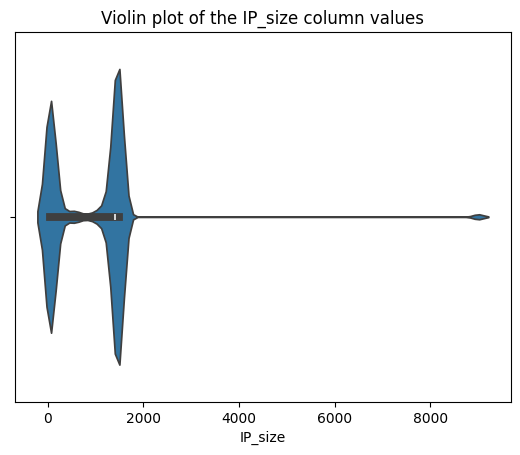

In [118]:
# Import libraries for data visualization
# Create violin plot to visualize IP packet size distribution
# Customize plot title
# Display the plot

import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(data = df.IP_size, orient='h')
plt.title("Violin plot of the IP_size column values")
plt.show()

Let's first check out the top 5 communication pairs

1. Identify top 5 source-destination IP pairs with most packets \
2. Analyze and print results for the top 5 traffic flows \
3. Attempt to lookup organization for source IP using external API \
4. Attempt to lookup organization for destination IP using external API \
5. Print results in a formatted table-like manner

In [81]:
# Identify top 5 source-destination IP pairs with most packets
# Analyze and print results for the top 5 traffic flows
# Attempt to lookup organization for source IP using external API
# Attempt to lookup organization for destination IP using external API
# Print results in a formatted table-like manner


top_freq = df.groupby(["src_IP", "dst_IP"])\
             .size()\
             .sort_values(ascending=False)\
             .nlargest(5)

for src_ip, dst_ip in top_freq.index:
    count = top_freq[(src_ip, dst_ip)]
    
    res_src = requests.get(f"http://ip-api.com/json/{src_ip}")
    org_src = res_src.json()["org"] if res_src.status_code == 200 else "No response from server"
    
    res_dst = requests.get(f"http://ip-api.com/json/{dst_ip}")
    org_dst = res_dst.json()["org"] if res_dst.status_code == 200 else "No response from server"
    
    print(f"Source: {src_ip:15} ({org_src+')':35}\tDestination: {dst_ip:15} ({org_dst+')':35}\tPacket count: {count}")

Source: 193.62.192.8    (European Bioinformatics Institute) 	Destination: 137.132.228.15  (National University of Singapore)  	Packet count: 3041
Source: 130.14.250.11   (National Library of Medicine)      	Destination: 103.37.198.100  (A*STAR)                            	Packet count: 2599
Source: 14.139.196.58   (Indian Institute of Technology)    	Destination: 192.101.107.153 (Battelle Memorial Institute, Pacific Northwest Division)	Packet count: 2368
Source: 140.112.8.139   ()                                  	Destination: 103.21.126.2    (Indian Institute of Technology Bombay)	Packet count: 2056
Source: 137.132.228.15  (National University of Singapore)  	Destination: 193.62.192.8    (European Bioinformatics Institute) 	Packet count: 1910


We can see these pairs were the top 5 pairs that have the highest amount of communication (packets)

Now to focus on the top 50 communicaton pairs and create a visualization of communications between different IP hosts

In [93]:
# We can see these pairs were the top 5 pairs that have the highest amount of communication (packets)
# Now to focus on the top 50 communicaton pairs and create a visualization of communications between different IP hosts

communication_pairs

,src_IP,dst_IP,count
0,-,-,1
1,0,0,90
2,10.1.26.28,192.203.230.10,1
3,10.11.14.202,160.36.2.94,1
4,10.11.7.211,198.202.121.142,1
...,...,...,...
6584,95.108.213.253,123.136.68.137,1
6585,95.57.73.150,120.124.170.136,1
6586,95.80.49.94,163.22.18.74,1
6587,fe80:0000:0000:0000:72e4:22ff:fe69:fb68,fe80:0000:0000:0000:224e:710b:c5cf:1b0f,1


This code investigates communication patterns for a specific source IP address ('155.69.160.32') by identifying its top 50 communication partners (destination IPs) based on packet count. \
It then constructs a directed graph where nodes represent IP addresses and directed edges depict communication flow. \
The graph visualization highlights frequently contacted destinations and the relative volume of traffic exchanged with each, providing insights into network traffic patterns.

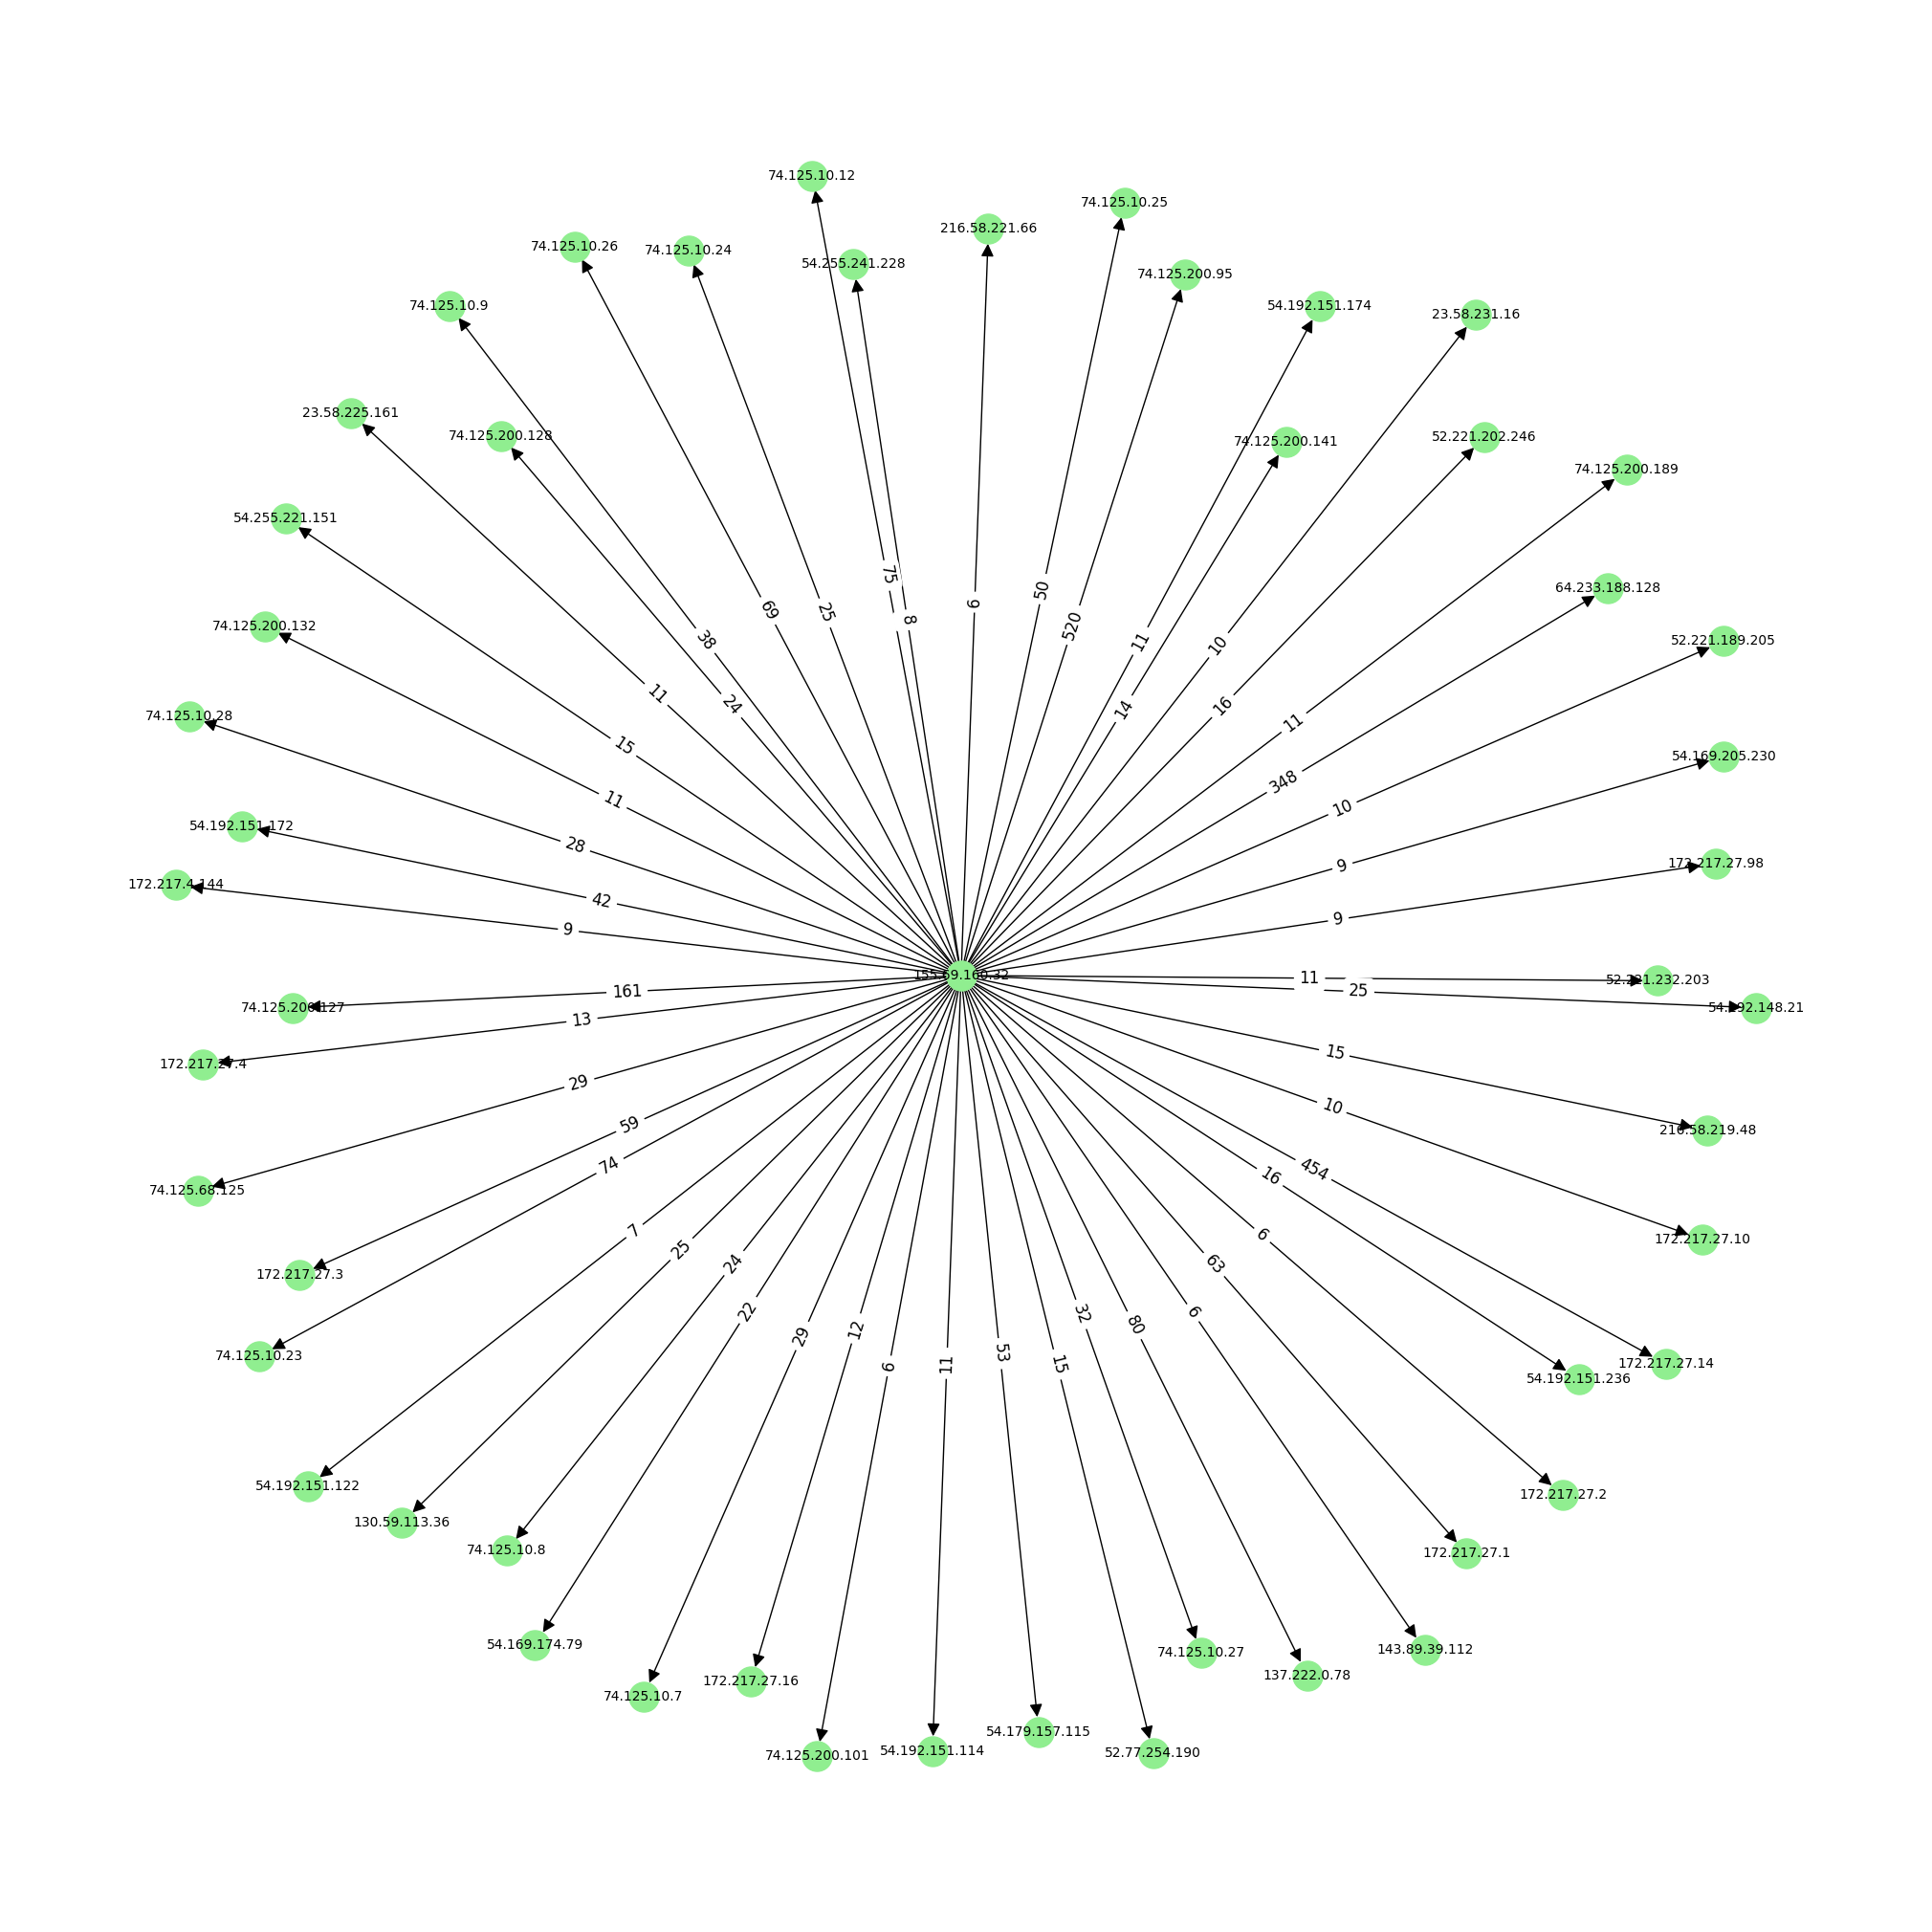

In [83]:
# This code investigates communication patterns for a specific source IP address ('155.69.160.32') by identifying its top 50 communication partners (destination IPs) based on packet count. 
# It then constructs a directed graph where nodes represent IP addresses and directed edges depict communication flow. 
# The graph visualization highlights frequently contacted destinations and the relative volume of traffic exchanged with each, providing insights into network traffic patterns.

import networkx as nx

communication_pairs = df[df['src_IP'] == '155.69.160.32'].groupby(["src_IP", "dst_IP"]).size().reset_index(name="count")
top_50_pairs = communication_pairs.sort_values("count", ascending=False).head(50)

# Create a new column in the top_50_pairs DataFrame
top_50_pairs['src_IP_dst_IP'] = list(zip(top_50_pairs['src_IP'], top_50_pairs['dst_IP']))
top_pairs = top_50_pairs["src_IP_dst_IP"].tolist()

# Filter the data to include only the top 50 communication pairs
filtered_df = df[df.apply(lambda row: (row["src_IP"], row["dst_IP"]) in top_pairs, axis=1)]

# Create a directed graph from the filtered dataframe
G_filtered = nx.from_pandas_edgelist(filtered_df, "src_IP", "dst_IP", create_using=nx.DiGraph())

# Draw the filtered graph with node labels
pos_filtered = nx.spring_layout(G_filtered, seed=42)
plt.figure(figsize=(20, 20))
nx.draw(G_filtered, pos_filtered, with_labels=True, node_size=500, node_color="lightgreen", arrowsize=20, font_size=10)

# Add edge labels with packet count
edge_labels_filtered = {(src, dst): filtered_df[(filtered_df["src_IP"] == src) & (filtered_df["dst_IP"] == dst)].shape[0] for src, dst in G_filtered.edges()}
nx.draw_networkx_edge_labels(G_filtered, pos_filtered, edge_labels=edge_labels_filtered, font_size=12)

# plt.title("Top 50 Communication Pairs")
plt.show()

This code explores a source IP's communication patterns by visualizing its top 50 communication partners (destination IPs) based on packet count. \
It first analyzes all traffic data, identifies the most frequent destinations, and focuses on the top 50. \
Then, it constructs a directed graph where nodes represent IP addresses and arrows show communication direction. \
The graph highlights frequently contacted destinations and the traffic volume between them using edge labels, providing insights into network activity for the specific source IP.

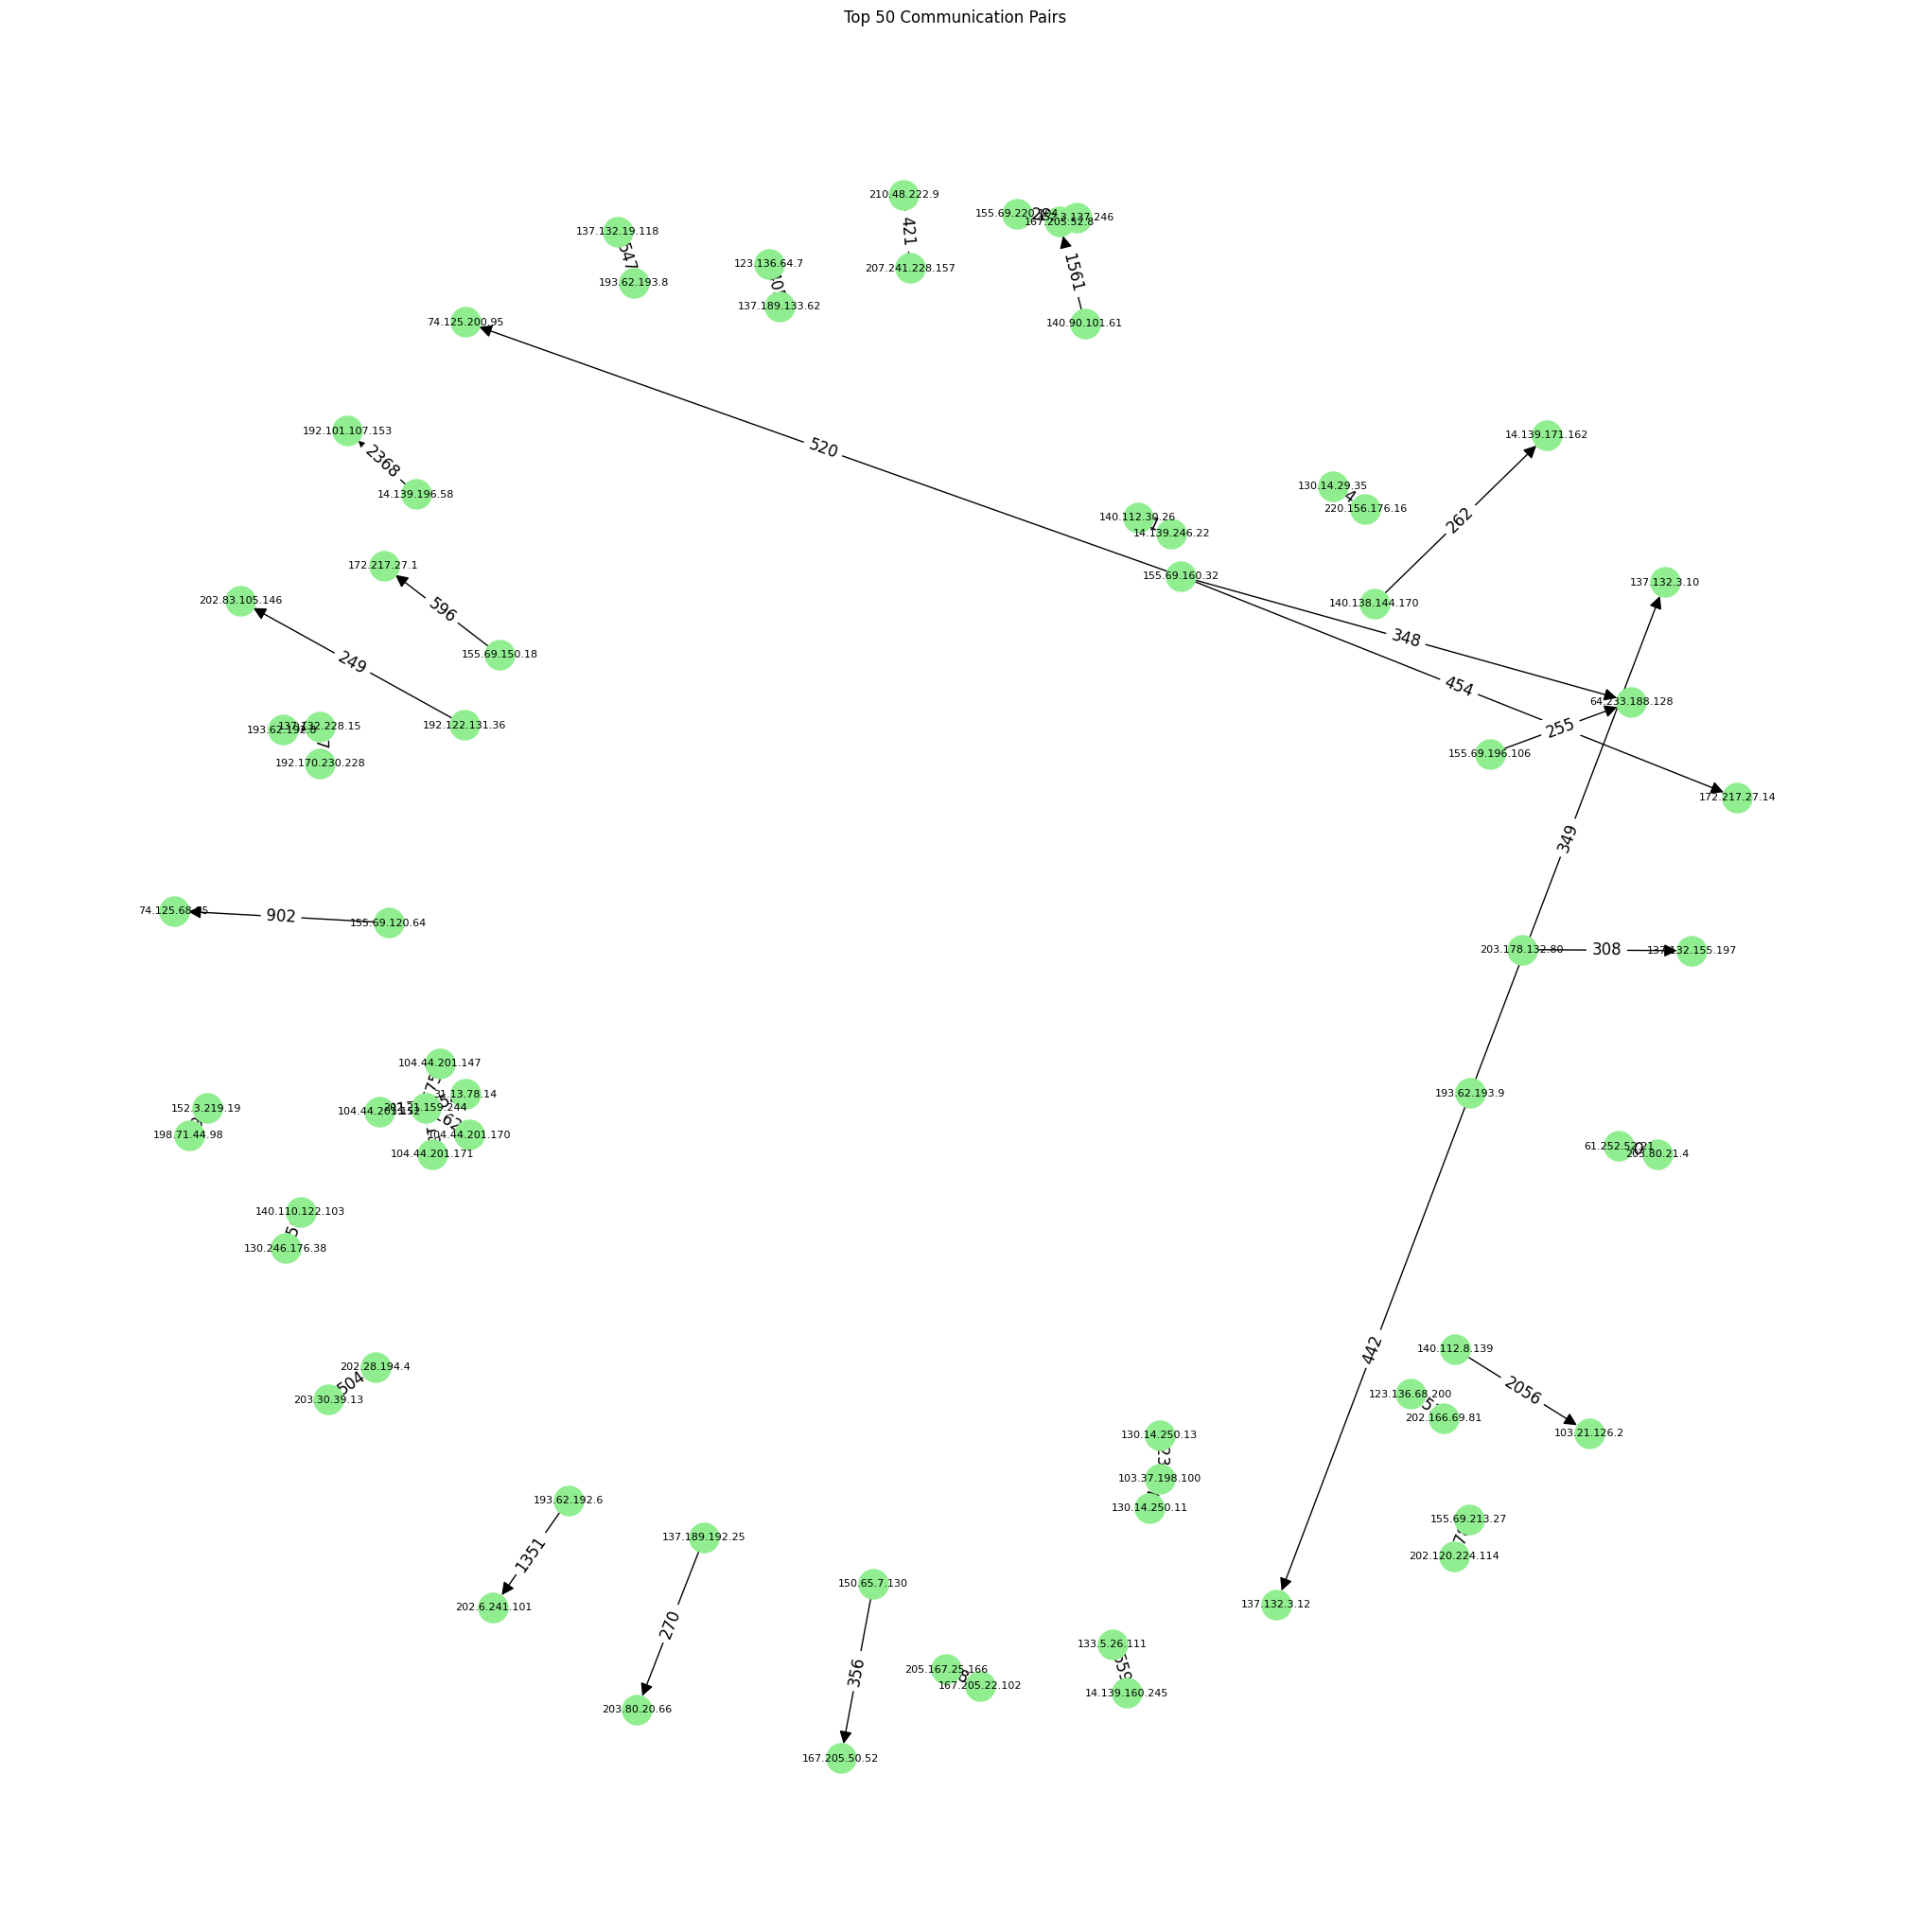

In [84]:
# This code explores a source IP's communication patterns by visualizing its top 50 communication partners (destination IPs) based on packet count. 
# It first analyzes all traffic data, identifies the most frequent destinations, and focuses on the top 50. 
# Then, it constructs a directed graph where nodes represent IP addresses and arrows show communication direction. 
# The graph highlights frequently contacted destinations and the traffic volume between them using edge labels, providing insights into network activity for the specific source IP.



import networkx as nx
import matplotlib.pyplot as plt

communication_pairs = df.groupby(["src_IP", "dst_IP"]).size().reset_index(name="count")
top_50_pairs = communication_pairs.sort_values("count", ascending=False).head(50)

# Create a new column in the top_50_pairs DataFrame
top_50_pairs['src_IP_dst_IP'] = list(zip(top_50_pairs['src_IP'], top_50_pairs['dst_IP']))
top_pairs = top_50_pairs["src_IP_dst_IP"].tolist()

# Filter the data to include only the top 50 communication pairs
filtered_df = df[df.apply(lambda row: (row["src_IP"], row["dst_IP"]) in top_pairs, axis=1)]

# Create a directed graph from the filtered dataframe
G_filtered = nx.from_pandas_edgelist(filtered_df, "src_IP", "dst_IP", create_using=nx.DiGraph())

# Draw the filtered graph with node labels
pos_filtered = nx.spring_layout(G_filtered, seed=42)
plt.figure(figsize=(20, 20))
nx.draw(G_filtered, pos_filtered, with_labels=True, node_size=500, node_color="lightgreen", arrowsize=20, font_size=8)

# Add edge labels with packet count
edge_labels_filtered = {(src, dst): filtered_df[(filtered_df["src_IP"] == src) & (filtered_df["dst_IP"] == dst)].shape[0] for src, dst in G_filtered.edges()}
nx.draw_networkx_edge_labels(G_filtered, pos_filtered, edge_labels=edge_labels_filtered, font_size=12)

plt.title("Top 50 Communication Pairs")
plt.show()

This code defines a function get_ip_info that retrieves information about an IP address using the IPWhois service. \
It first creates an IPWhois object and attempts an RDAP lookup to get details. If successful, it returns a dictionary with the retrieved information. \
The function handles errors like invalid IP addresses and other exceptions during the lookup process, printing informative messages and returning None to indicate failure.

In [85]:
# This code defines a function get_ip_info that retrieves information about an IP address using the IPWhois service. 
# It first creates an IPWhois object and attempts an RDAP lookup to get details. If successful, it returns a dictionary with the retrieved information. 
# The function handles errors like invalid IP addresses and other exceptions during the lookup process, printing informative messages and returning None to indicate failure.


# code for getting ip information using IPWhois
def get_ip_info(ip):
    try:
        ipwhois = IPWhois(ip)
        result = ipwhois.lookup_rdap(depth=1)
        return result
    except IPDefinedError:
        return None
    # except http error as well
    except Exception as e:
        print(e)
        return None

In [86]:
# This code visualizes a network communication graph using Plotly, enhancing it with interactive features and IP details. 
# It constructs edge and node traces based on a filtered graph, maps coordinates for proper layout, and incorporates IP information for hover text and node coloring. 
# The plot visually maps communication patterns with edge connections, interactively reveals IP details and connections upon hovering, and highlights frequently connected nodes through color-coding and sizing.


import plotly.graph_objs as go

# Initialize edge trace
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=1, color="gray"),
    hoverinfo="none",
    mode="lines",
)

# Add edge coordinates to the edge trace
for src, dst in G_filtered.edges():
    x0, y0 = pos_filtered[src]
    x1, y1 = pos_filtered[dst]
    edge_trace["x"] += (x0, x1, None)
    edge_trace["y"] += (y0, y1, None)

# Initialize node trace
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode="markers+text",
    hoverinfo="text",
    hovertext=[],
    marker=dict(
        symbol="circle",
        showscale=True,
        colorscale="Viridis",
        reversescale=True,
        color=[],
        size=[],
        colorbar=dict(thickness=15, title="Node Connections", xanchor="left", titleside="right"),
        line=dict(width=2, color="black"),
    ),
    textposition="bottom center",
)

# Add node coordinates, labels, and hover text to the node trace
for node in G_filtered.nodes():
    x, y = pos_filtered[node]
    num_connections = G_filtered.degree[node]
    node_trace["x"] += tuple([x])
    node_trace["y"] += tuple([y])
    node_trace["text"] += tuple("")
    ip_info = get_ip_info(node)
    if ip_info:
        country = ip_info["network"]["country"]
        org = ip_info["network"]["name"]
        hover_text = f"IP: {node}<br>Connections: {num_connections}<br>Country: {country}<br>Organization: {org}"
    else:
        hover_text = f"IP: {node}<br>Connections: {num_connections}"
    node_trace["hovertext"] += tuple([hover_text])
    node_trace["marker"]["color"] += tuple([num_connections])
    node_trace["marker"]["size"] += tuple([num_connections * 10])

# Create a Plotly figure with the edge and node traces
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title="Communication Pairs",
        showlegend=False,
        hovermode="closest",
        margin=dict(b=20, l=5, r=5, t=40),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        plot_bgcolor="white",  # Change the background color
    ),
)

# Show the figure
fig.show()

HTTP lookup failed for http://whois.nic.ad.jp/cgi-bin/whois_gw?lang=%2Fe&key=KO3068JP&submit=query.
HTTP lookup failed for http://rdap.apnic.net/ip/140.112.30.26.
HTTP lookup failed for http://rdap.apnic.net/ip/61.252.52.21.
HTTP lookup failed for http://rdap.apnic.net/ip/203.178.132.80.
HTTP lookup failed for http://rdap.apnic.net/ip/140.138.144.170.
HTTP lookup failed for http://rdap.apnic.net/ip/140.112.8.139.
HTTP lookup failed for http://rdap.apnic.net/ip/140.110.122.103.
